Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:

a.	Import the necessary packages

b.	Load the training and testing data 

c.	Define the network architecture using Keras 

d.	Train the model using SGD/Adam optimizer

e.	Evaluate the network  

f.	Plot the training loss and accuracy

In [16]:
# Import the necessary packages (ratta)
import matplotlib.pyplot as plt # visual lib
import tensorflow as tf
# model building
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [17]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

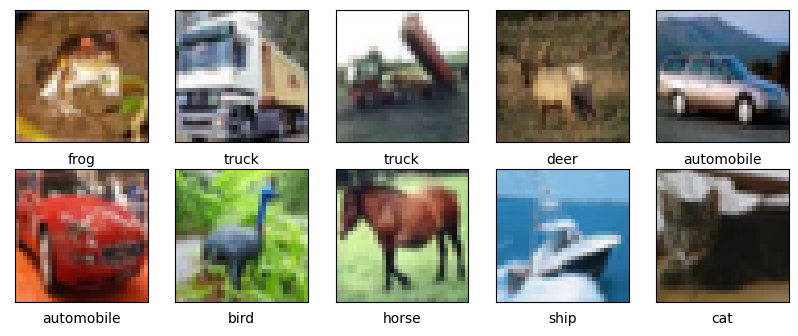

In [18]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [19]:
train_images.shape

(50000, 32, 32, 3)

In [20]:
# Converting matrix into array

X_train = train_images.reshape((train_images.shape[0], 32 * 32 * 3))
X_test = test_images.reshape((test_images.shape[0], 32 * 32 * 3))

In [21]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [22]:
X_train.shape

(50000, 3072)

In [23]:
Y_train, Y_test = train_labels, test_labels

In [24]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [25]:
Y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [26]:
#building ANN model
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
Total params: 403,410
Trainable params: 403,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
epochs = 10 

In [28]:
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])
S = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10)

Epoch 1/10


2022-11-13 23:06:21.307357: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 6s 4ms/step - loss: 1.9357 - accuracy: 0.2967 - val_loss: 1.8756 - val_accuracy: 0.3124
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7335 - accuracy: 0.3785 - val_loss: 1.6813 - val_accuracy: 0.4042
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6519 - accuracy: 0.4089 - val_loss: 1.6994 - val_accuracy: 0.3877
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5952 - accuracy: 0.4334 - val_loss: 1.6994 - val_accuracy: 0.3900
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5519 - accuracy: 0.4484 - val_loss: 1.5673 - val_accuracy: 0.4368
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5154 - accuracy: 0.4597 - val_loss: 1.5247 - val_accuracy: 0.4475
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4867 - accuracy: 0.4714 - val_loss: 1.6215 - val_accuracy: 0.4390
Epo

In [29]:
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
A = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10)

Epoch 1/10


2022-11-13 23:07:03.501066: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 5s 3ms/step - loss: 1.7302 - accuracy: 0.3752 - val_loss: 1.7430 - val_accuracy: 0.3756
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6275 - accuracy: 0.4186 - val_loss: 1.5818 - val_accuracy: 0.4318
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5817 - accuracy: 0.4337 - val_loss: 1.5935 - val_accuracy: 0.4334
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5532 - accuracy: 0.4464 - val_loss: 1.6094 - val_accuracy: 0.4299
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5224 - accuracy: 0.4547 - val_loss: 1.5337 - val_accuracy: 0.4495
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5021 - accuracy: 0.4605 - val_loss: 1.5260 - val_accuracy: 0.4544
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4809 - accuracy: 0.4723 - val_loss: 1.5306 - val_accuracy: 0.4524
Epo

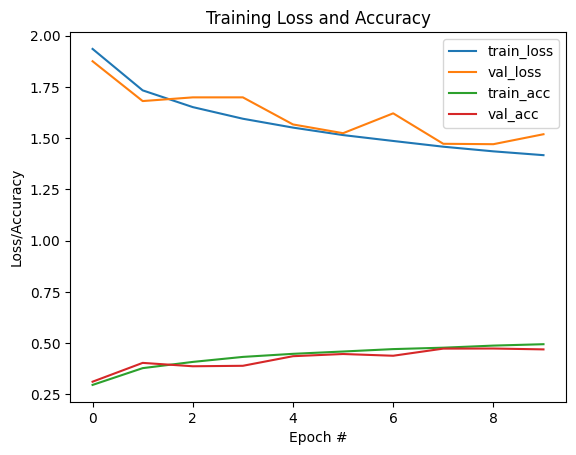

In [30]:
#plotting the training loss and accuracy
plt.figure()
plt.plot(np.arange(0, epochs), S.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), S.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), S.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), S.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

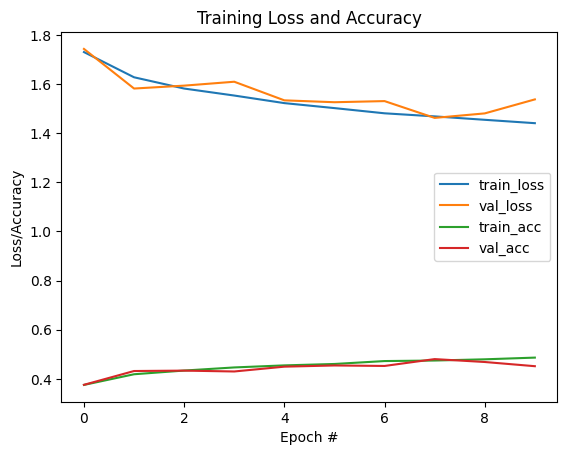

In [31]:
#plotting the training loss and accuracy
plt.figure()
plt.plot(np.arange(0, epochs), A.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), A.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), A.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), A.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()